In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [182]:
df = pd.read_csv("/content/titanic_toy.csv")

In [162]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [183]:
x = df.drop(columns='Survived')
y = df['Survived']

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [166]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [167]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [168]:
mean_age = x_train['Age'].mean()
median_fare = x_train['Fare'].median()

In [169]:
mean_age
median_fare

14.4

In [170]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

In [171]:
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)

In [173]:
x_train.sample(5)

,Age,Fare,Family,Age_mean,Fare_median
825,NaN,6.9500,0,29.498846,6.9500
483,63.0,9.5875,0,63.000000,9.5875
234,24.0,10.5000,0,24.000000,10.5000
888,NaN,23.4500,3,29.498846,23.4500
418,30.0,NaN,0,30.000000,14.4000


In [174]:
print('Original Age variable variance: ', x_train['Age'].var())

print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())


Original Age variable variance:  210.2517072477438
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777


<Axes: ylabel='Density'>

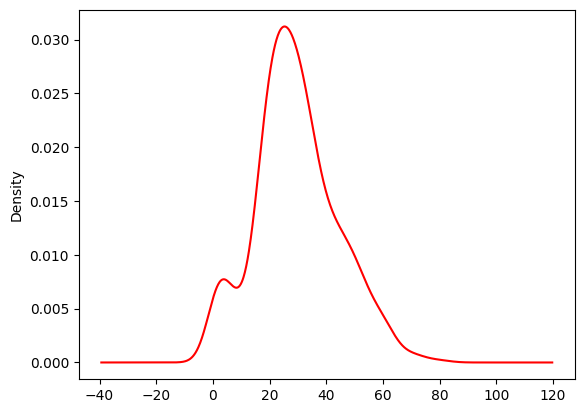

In [175]:
x_train['Age'].plot(kind='kde',color='red')

<Axes: ylabel='Density'>

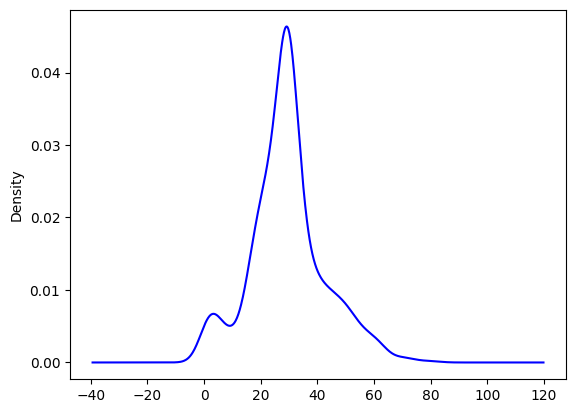

In [176]:
x_train['Age_mean'].plot(kind='kde',color='blue')

<Axes: ylabel='Density'>

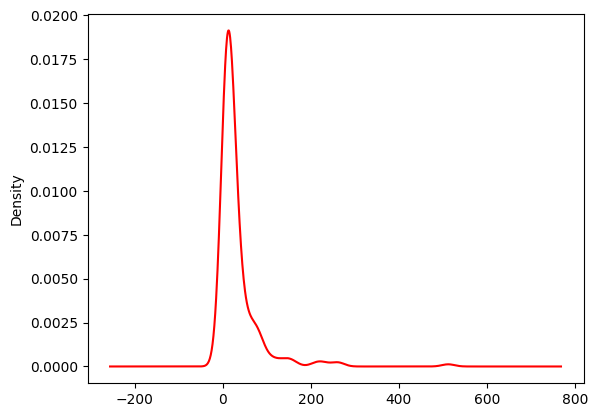

In [177]:
x_train['Fare'].plot(kind='kde',color='red')


<Axes: ylabel='Density'>

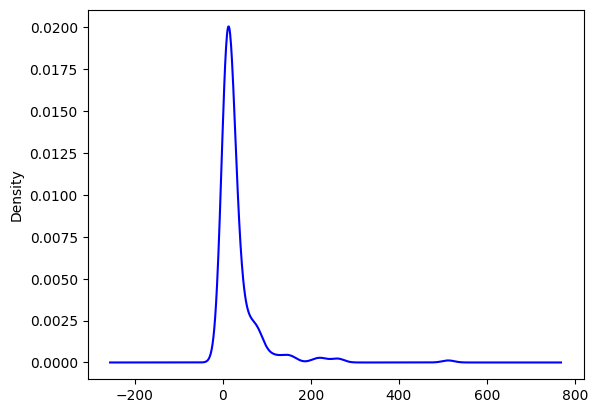

In [178]:
x_train['Fare_median'].plot(kind='kde',color='blue')


In [179]:
x_train.cov()

,Age,Fare,Family,Age_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,56.282518
Fare_median,70.082085,2761.031435,17.672035,56.282518,2637.012482


In [180]:
x_train.corr()

,Age,Fare,Family,Age_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.084346
Fare_median,0.087232,1.000000,0.204536,0.084346,1.000000


<Axes: >

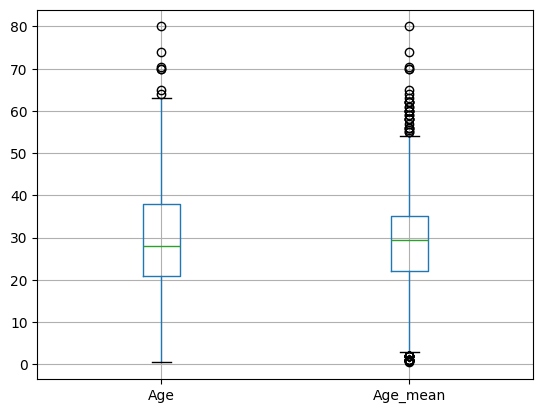

In [184]:
x_train[['Age','Age_mean']].boxplot()

<Axes: >

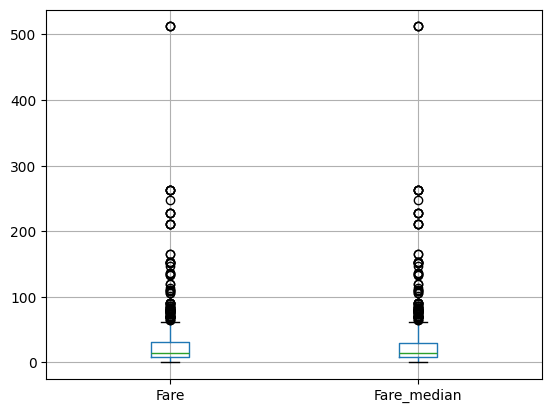

In [185]:
x_train[['Fare','Fare_median']].boxplot()